###**채널이란?**
 채널은 그래픽스 이미지의 색상 정보를 포함하고 있습니다.

채널은 일반적으로 Red, Blue, Green과 추가적으로 Alpha가 존재합니다.

이외에도 Hue, Saturation,Value 등의 채널도 존재합니다.

색상을 표시할 때는 주로, 3 ~ 4 채널의 값을 사용하고, 흑백의 이미지를 표현할 때는 1 채널을 사용합니다.

3 ~ 4 개의 채널을 가질 때는 다 채널 또는 다중 채널을 뜻합니다. 1 개의 채널을 가질 때는 단일 채널을 뜻합니다.

색상 이미지 (RGB)에서 Red의 값만 추출한다해서 빨간색으로 표현되지는 않습니다.

그 이유는 한 가지의 채널로만 색상을 표현해야하기 때문입니다. 다음의 이미지에서 이미지를 채널별로 분리했을 때의 결과를 확인할 수 있습니다

![](https://076923.github.io/assets/posts/Theory/ComputerVision/lecture-3/5.webp)



R의 성분, G의 성분, B의 성분만 따로 뽑아내서 출력했지만 흑백으로 출력됩니다.

즉, **해당 성분에 가까울수록 하얀색으로 출력되고 아닌 값은 검은색으로 출력됩니다**

이미지에서 파란 부분의 색상 정보를 확인해보겠습니다. 보시는 바와 같이 아무리 파란색이라도 약간의 적색이나 녹색이 포함되어있습니다.

만약, 파란색의 색상만 출력하고 싶다면 채널을 다 채널로 사용하고 파란색의 성분을 가지는 블루 채널을 마스크로 씌우거나 Hue의 색상을 가져와야 파란색의 색상으로 출력할 수 있습니다.

간단하게 흑백이나 특정 색상 데이터를 가져온다면 채널은 단일 채널로 사용해야합니다.

많은 함수나 메소드에서 계산 시, 데이터의 양을 줄이고 정확도를 높이기 위하여 단일 채널로 계산을 진행합니다.

우리가 OpenCV에서 알고리즘을 적용할 때, 계산 이미지를 Binary나 GrayScale을 적용하는 이유입니다.






# **Color Spaces**

1. View the individual channels of an RGB Image(이미지의 각채널에 대해 본다.)
2. Manipulate a color space(색상을 조절해본다.)
3. Introduce HSV Color Spaces(HSV색상에 대해 알아보자)

In [1]:
# 필요라이브러리 임포트
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 보여주는 함수 정의 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# 이미지 다운받고 압축풀기
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-14 02:12:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.158
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  22.8MB/s    in 1.2s    

2022-09-14 02:12:41 (22.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [4]:
#이미지를 가져오자
image = cv2.imread('./images/castara.jpeg')

#cv2.split를 사용하여 각생상의 공간을 분리하자
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)
print(image.shape)

(1280, 960)
(1280, 960)
(1280, 960)
(1280, 960, 3)


확인을 해보면 이미지의 속성정보에서는 3이라는 것이 보인다. cv2.split한 B,G,R이미지에대해서는 3이라는 숫자가 안보이는것은 하나의 색상으로만 이루어져있다는 뜻





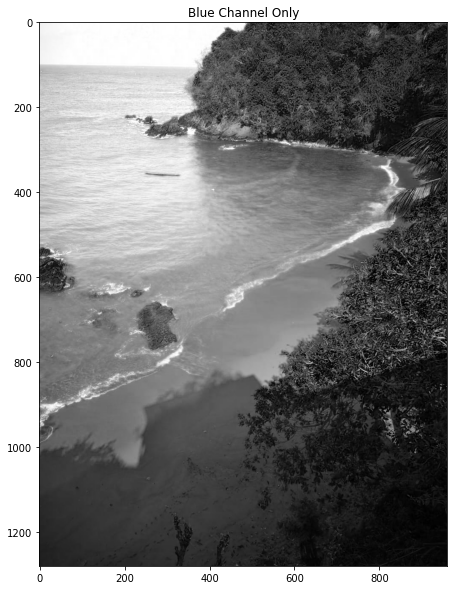

In [5]:
#Blue값만 있을때 이미지가 어떻게 표현되는지 확인해보자
imshow("Blue Channel Only", B)

파란색인 부분은 하얗게 아닌 부분은 어둡게 처리된다.

In [6]:
image.shape[:2]

(1280, 960)

아니 그러면 빨간색으로만 파란색으로만 녹색으로만 된 이미지는 어떻게 만드는거야

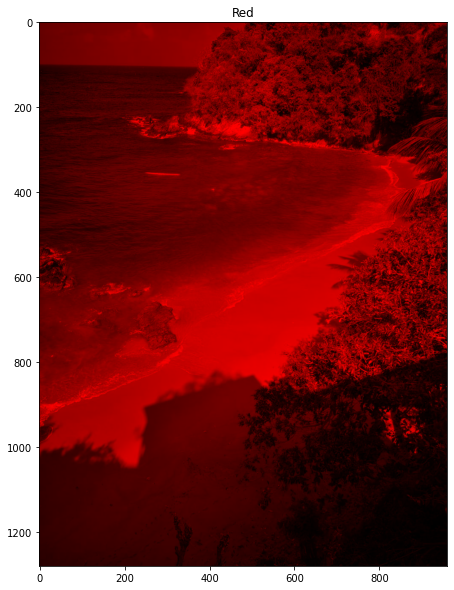

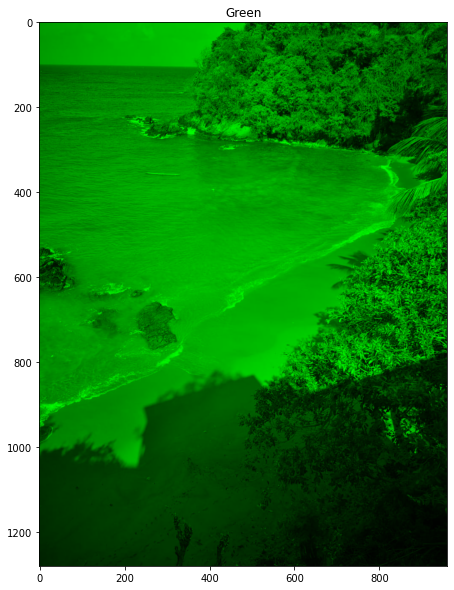

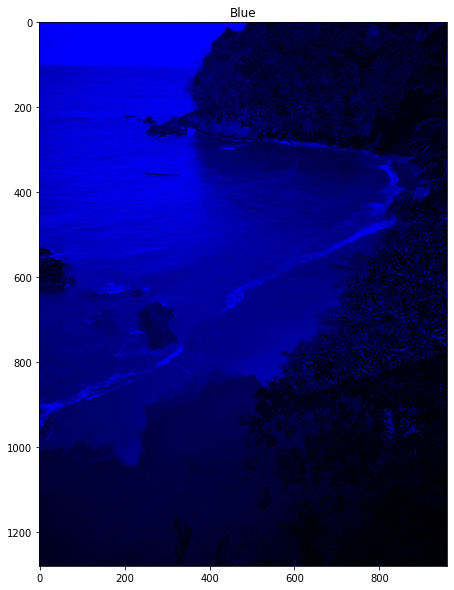

In [7]:
import numpy as np

# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8") #np.zeros((1280, 960)) 1280행960열짜리 원소가 모두 0인행렬을 만들어라.uint
'''- unsigned int의 약자.  '''                     #np.zeros((2, 3, 5)) 2행3열짜리 0의 모임을 5개 만들어라
'''- 양수만 표현(0~4,294,967,295(2^32-1))
   - 주로 색상값을 저장할때 사용.'''

imshow("Red", cv2.merge([zeros, zeros, R])) # B값은0 G값 또한 0 R값은 cv2.split(image)의 마지막값(R) 로 채워 넣는다.
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

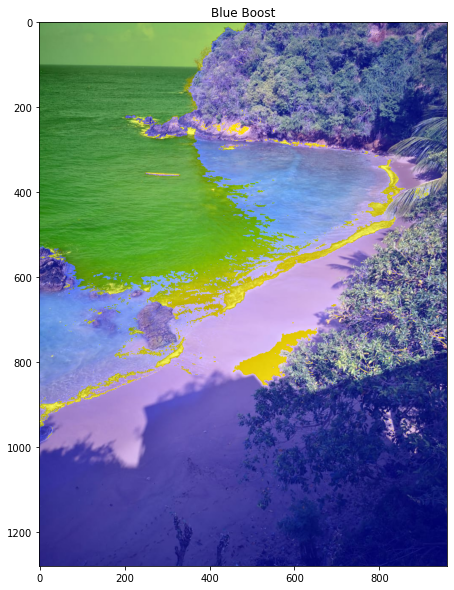

In [8]:
# 파란부분을 증폭시켜서 보자
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

이미지내에서 파란부분만 증폭시키는것은 간단하다.

1.이미지내의 파란부분,초록부분,빨간부분을 찾아준다.
cv2.split(image)

2.파란부분만 숫자를 높여준후에 합쳐준다.
cv2.merge([B+20,G,R])

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

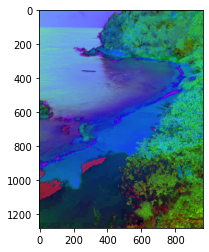

In [15]:
# 이미지를 다시 가져오자
image = cv2.imread('./images/castara.jpeg')

# 이미지의 색상을 BGR에서 HSV로 바꾸자 (array가 바뀐다.)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#바뀐 이미지를 보자
plt.imshow(hsv_image)



###**HSV의 각각의 채널타입에대해 보자**

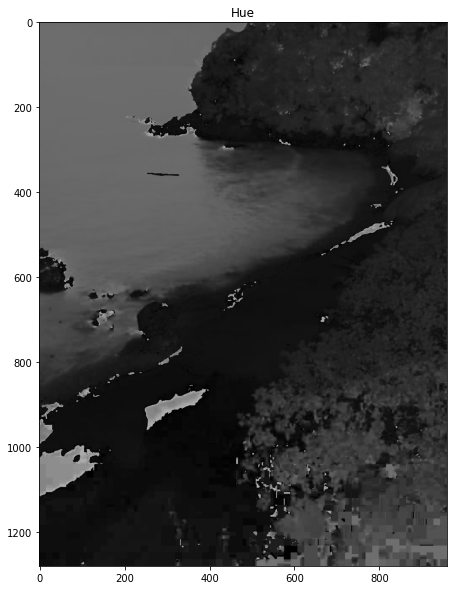

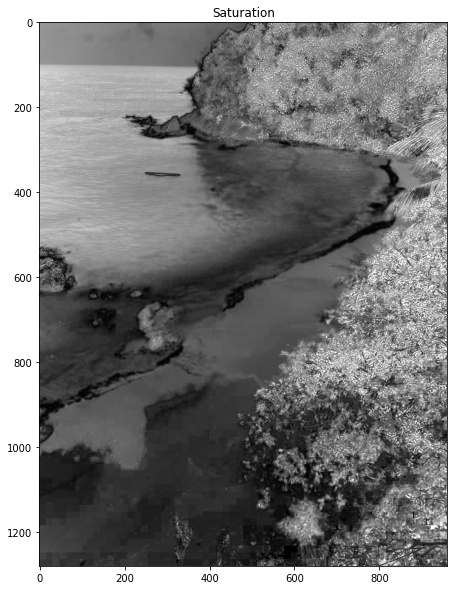

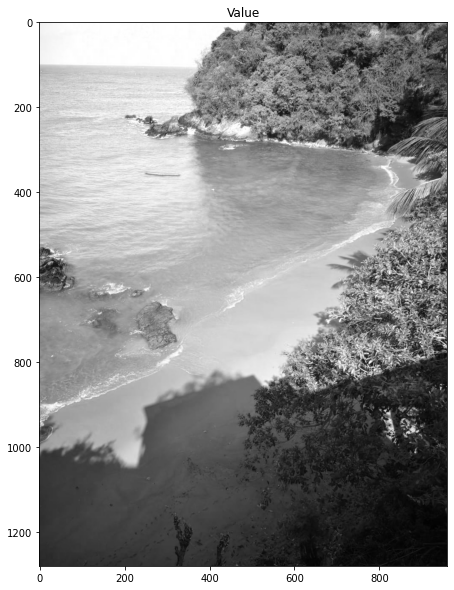

In [17]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0]) #hsv_image는 cv2.cvtColor(image, cv2.COLOR_BGR2HSV)의해 hsv채널을 가진다 이중에서 h값만 가져온다.=0
imshow("Saturation", hsv_image[:, :, 1]) #s값만 가져온다=1
imshow("Value", hsv_image[:, :, 2])#v값만 가져온다=2